## ACTIVIDAD 2: CLASIFICACIÓN DE TEXTO
### Marta Alejandra Llanos Rodríguez

En este documento mostraré los modelos y sus resultados con 100 features en la matriz TF-idf y quitando las stop words. 

Estructura del documento: 
1. Pre-procesamiento de datos 
2. Matriz TF-idf
3. División prueba y entrenamiento
4. Modelos de entrenamiento 

    a. Clasificador bayesiano ingenuo 

    b. Máquinas SMV 
    
    c. Modelo árbol de decisión
    
5. Resumen de los modelos

In [2]:
#Librerias
import numpy as np 
import pandas as pd
import string 
import re
import spacy


### 1. Pre-procesamiento de datos 

Lectura de datos

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df= df [['v1','v2']]
df.head(2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


Eliminacion stop words

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import pandas as pd

def remove_stopwords_from_column(dataframe, column_name):
    stop_words = set(stopwords.words('english'))

    # Aplicar la función de tokenización y eliminación de stop words a cada fila de la columna
    dataframe[column_name] = dataframe[column_name].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

    return dataframe

df = remove_stopwords_from_column(df, 'v2')
df.head(2)

,v1,v2
0,ham,"Go jurong point , crazy .. Available bugis n g..."
1,ham,Ok lar ... Joking wif u oni ...


### 2. Matriz TF-idf

In [5]:
docs = df['v2']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features = 100, lowercase= True)

# Transformar los textos en vectores TF-IDF
X_tfidf = vectorizer.fit_transform(docs)

# Mostrar el vocabulario TF-IDF generado
print("Vocabulario TF-IDF:", vectorizer.get_feature_names_out())

# Mostrarlo en dataframe
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out(), index=docs)

tfidf_df.head()

Vocabulario TF-IDF: ['already' 'also' 'amp' 'anything' 'ask' 'babe' 'back' 'call' 'cash'
 'claim' 'come' 'cos' 'da' 'day' 'dear' 'dont' 'every' 'find' 'free' 'get'
 'give' 'go' 'going' 'good' 'got' 'great' 'gt' 'happy' 'hey' 'hi' 'home'
 'hope' 'im' 'know' 'last' 'later' 'let' 'life' 'like' 'll' 'lol' 'lor'
 'love' 'lt' 'make' 'meet' 'message' 'miss' 'mobile' 'morning' 'msg'
 'much' 'na' 'need' 'new' 'night' 'number' 'oh' 'ok' 'one' 'phone'
 'please' 'pls' 'prize' 're' 'really' 'reply' 'right' 'said' 'say' 'see'
 'send' 'sorry' 'still' 'stop' 'take' 'tell' 'text' 'thanks' 'think'
 'time' 'today' 'tomorrow' 'txt' 'uk' 'ur' 've' 'wan' 'want' 'wat' 'way'
 'week' 'well' 'win' 'work' 'would' 'www' 'yeah' 'yes' 'ì_']


,already,also,amp,anything,ask,babe,back,call,cash,claim,...,way,week,well,win,work,would,www,yeah,yes,ì_
v2,,,,,,,,,,,,,,,,,,,,,
"Go jurong point , crazy .. Available bugis n great world la e buffet ... Cine got amore wat ...",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Ok lar ... Joking wif u oni ...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) & C 's apply 08452810075over18 's,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.577414,0.0,0.0,0.0,0.0,0.0,0.0
U dun say early hor ... U c already say ...,0.446435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Nah n't think goes usf , lives around though",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Palabras con más peso en porcentaje:


<Axes: >

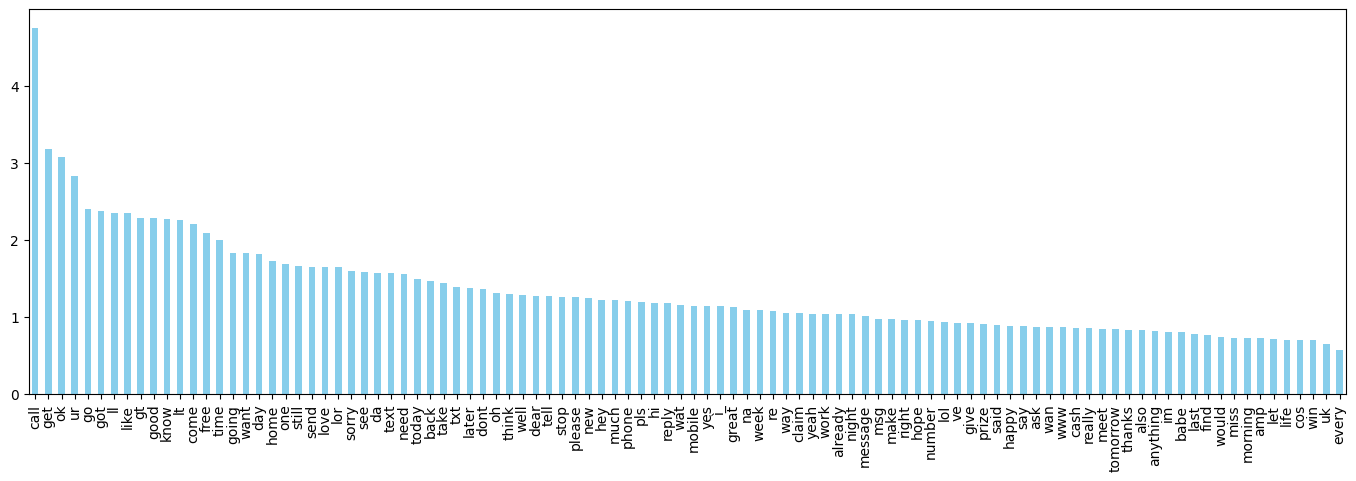

In [7]:
import matplotlib.pyplot as plt
tfidf_scores_percent = (tfidf_df.mean() * 100).round(2).sort_values(ascending=False)
print("Palabras con más peso en porcentaje:")
tfidf_scores_percent.plot(kind='bar', figsize=(17, 5), color='skyblue')

### 3. División prueba y entrenamiento

In [8]:
categs = df['v1']


In [9]:
from sklearn.model_selection import train_test_split
docs_train, docs_test, categs_train, categs_test = train_test_split(X_tfidf, categs, test_size = 0.25, 
                                                                    random_state = 50)

### 4. Modelos de entrenamiento

#### a. Clasificador bayesiano ingenuo

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(docs_train, categs_train)

MultinomialNB()

In [11]:
# Predicción del set de test

categs_pred_clf = clf.predict(docs_test)

In [12]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_clf = confusion_matrix(categs_test, categs_pred_clf)
cm_clf

array([[1179,   14],
       [  57,  143]])

In [13]:
acc_train_clf = clf.score(docs_train, categs_train)
acc_test_clf = clf.score(docs_test, categs_test)
fiabilidad_clf = acc_test_clf / acc_train_clf

print("Accuracy entrenamiento: ", acc_train_clf)
print("Accuracy PRUEBA: ", acc_test_clf)
print("Fiabilidad: ", acc_test_clf / acc_train_clf)  

Accuracy entrenamiento:  0.9607561617611868
Accuracy PRUEBA:  0.9490308686288585
Fiabilidad:  0.9877957658779577


#### b. Máquinas SMV 

In [14]:
# Entrenamiento del clasificador NB

from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(docs_train, categs_train)

SVC(kernel='linear')

In [15]:
# Predicción del set de test

categs_pred_svm = svm.predict(docs_test)

In [16]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(categs_test, categs_pred_svm)
cm_svm

array([[1173,   20],
       [  41,  159]])

In [17]:
acc_train_svm = svm.score(docs_train, categs_train)
acc_test_svm = svm.score(docs_test, categs_test)
fiabilidad_svm = acc_test_svm / acc_train_svm

print("Accuracy entrenamiento: ", acc_train_svm)
print("Accuracy PRUEBA: ", acc_test_svm)
print("Fiabilidad: ", acc_test_svm / acc_train_svm)  

Accuracy entrenamiento:  0.9686527877482651
Accuracy PRUEBA:  0.9562096195262024
Fiabilidad:  0.9871541501976284


#### b. Modelo árbol de decisión

Árboles de decisión

In [18]:
# Entrenamiento del clasificador Árboles de Decisión

from sklearn import tree

a_dec = tree.DecisionTreeClassifier()
a_dec.fit(docs_train, categs_train)

DecisionTreeClassifier()

In [19]:
# Predicción del set de test

categs_preda_dec = a_dec.predict(docs_test)

In [20]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cma_dec = confusion_matrix(categs_test, categs_preda_dec)
cma_dec

array([[1165,   28],
       [  39,  161]])

In [21]:
acc_traina_dec = a_dec.score(docs_train, categs_train)
acc_testa_dec = a_dec.score(docs_test, categs_test)
fiabilidad_dec = acc_testa_dec / acc_traina_dec

print("Accuracy entrenamiento: ", acc_traina_dec)
print("Accuracy PRUEBA: ", acc_testa_dec)
print("Fiabilidad: ", acc_testa_dec / acc_traina_dec)  

Accuracy entrenamiento:  0.985163914812156
Accuracy PRUEBA:  0.9519023689877961
Fiabilidad:  0.9662375516152538


Random Forest

In [22]:
# Entrenamiento del clasificador Árboles de Decisión

from sklearn.ensemble import RandomForestClassifier

r_f = RandomForestClassifier(n_estimators=10)
r_f.fit(docs_train, categs_train)

RandomForestClassifier(n_estimators=10)

In [23]:
# Predicción del set de test

categs_predr_f = r_f.predict(docs_test)

In [24]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cmr_f = confusion_matrix(categs_test, categs_predr_f)
cmr_f

array([[1176,   17],
       [  36,  164]])

In [25]:
acc_trainr_f = r_f.score(docs_train, categs_train)
acc_testr_f = r_f.score(docs_test, categs_test)
fiabilidadr_f = acc_testr_f / acc_trainr_f

print("Accuracy entrenamiento: ", acc_trainr_f)
print("Accuracy PRUEBA: ", acc_testr_f)
print("Fiabilidad: ", acc_testr_f / acc_trainr_f)  

Accuracy entrenamiento:  0.9834888729361091
Accuracy PRUEBA:  0.9619526202440776
Fiabilidad:  0.9781021897810219


### 5. Resumen de los modelos

In [26]:
data = {
    'Modelo': ['Naive Bayes', 'SVM', 'Árbol de Decisión', 'Random Forest'],
    'Acc entrenamiento': [round(acc_train_clf,3), round(acc_train_svm,3), round(acc_traina_dec,3), round(acc_trainr_f,3)],
    'Acc test': [round(acc_test_clf,3), round(acc_test_svm,3), round(acc_testa_dec,3), round(acc_testr_f,3)],
    'Fiabilidad': [round(fiabilidad_clf,3), round(fiabilidad_svm,3), round(fiabilidad_dec,3), round(fiabilidadr_f,3)]
}

# Crear un DataFrame con el diccionario
resumen_modelos = pd.DataFrame(data)
resumen_modelos

,Modelo,Acc entrenamiento,Acc test,Fiabilidad
0,Naive Bayes,0.961,0.949,0.988
1,SVM,0.969,0.956,0.987
2,Árbol de Decisión,0.985,0.952,0.966
3,Random Forest,0.983,0.962,0.978


In [27]:
resumen_modelos['Verdaderos Positivos'] = [cm_clf[0, 0], cm_svm[0, 0], cma_dec[0, 0], cmr_f[0, 0]]
resumen_modelos['Falsos Positivos'] = [cm_clf[0, 1], cm_svm[0, 1], cma_dec[0, 1], cmr_f[0, 1]]
resumen_modelos['Falsos Negativos'] = [cm_clf[1, 0], cm_svm[1, 0], cma_dec[1, 0], cmr_f[1, 0]]
resumen_modelos['Verdaderos Negativos'] = [cm_clf[1, 1], cm_svm[1, 1], cma_dec[1, 1], cmr_f[1, 1]]


In [28]:
Modelos_100f_stop = resumen_modelos
Modelos_100f_stop

,Modelo,Acc entrenamiento,Acc test,Fiabilidad,Verdaderos Positivos,Falsos Positivos,Falsos Negativos,Verdaderos Negativos
0,Naive Bayes,0.961,0.949,0.988,1179,14,57,143
1,SVM,0.969,0.956,0.987,1173,20,41,159
2,Árbol de Decisión,0.985,0.952,0.966,1165,28,39,161
3,Random Forest,0.983,0.962,0.978,1176,17,36,164


In [31]:
Modelos_100f_stop.to_csv('Modelos_100f_stop.csv', index=False)